# Kernel SVM

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [5]:
data = pd.read_csv("Social_Network_Ads.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [7]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


### Spiting the dataset into training and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[-0.86943418 -0.32958142]
 [ 1.08265326  0.5067641 ]
 [-0.86943418 -1.10824794]
 [-0.77647764 -0.67565543]
 [ 0.43195745 -0.15654441]
 [-0.31169491  1.19891212]
 [-1.33421691 -0.64681593]
 [ 1.64039253  1.71802313]
 [-0.68352109  0.5356036 ]
 [ 0.06013127 -0.58913692]
 [ 0.06013127  0.01649259]
 [-0.40465146 -0.56029742]
 [ 0.24604436  2.06409714]
 [-1.61308654 -0.61797643]
 [-0.497608    1.34310962]
 [-1.70604309 -1.48316145]
 [-0.86943418  1.51614662]
 [-0.12578182  0.82399861]
 [ 1.82630562 -0.30074192]
 [ 1.82630562  1.48730712]
 [ 0.15308781 -0.81985293]
 [ 0.71082708 -1.28128494]
 [ 0.3390009   0.04533209]
 [-0.86943418  0.3914061 ]
 [-0.59056455  0.5356036 ]
 [ 0.15308781  0.01649259]
 [-1.70604309  0.16069009]
 [ 0.80378363  0.5067641 ]
 [-1.79899964 -0.76217393]
 [ 1.3615229  -1.42548244]
 [-0.96239073 -1.54084045]
 [ 2.10517526 -0.81985293]
 [ 0.71082708 -1.39664294]
 [ 1.73334908 -0.30074192]
 [ 1.17560981  0.5067641 ]
 [-1.70604309  0.4202456 ]
 [-0.96239073 -0.38726042]
 

In [11]:
print(X_test)

[[ 1.73334908  1.80454163]
 [-0.86943418  0.4202456 ]
 [ 0.98969672  1.94873913]
 [-1.05534727 -1.02172943]
 [-0.21873837 -1.45432194]
 [ 0.3390009  -0.30074192]
 [ 0.71082708 -1.10824794]
 [-0.03282528 -0.44493942]
 [-0.21873837 -0.67565543]
 [-0.12578182  1.57382563]
 [-0.96239073 -0.35842092]
 [ 1.17560981 -0.99288993]
 [-1.42717345  0.3048876 ]
 [-0.03282528 -0.50261842]
 [ 0.15308781  0.18952959]
 [ 0.15308781 -0.81985293]
 [ 1.82630562 -1.28128494]
 [ 0.3390009   0.4779246 ]
 [-0.03282528  0.2760481 ]
 [-0.497608    1.86222063]
 [-1.33421691 -0.21422342]
 [-0.68352109 -0.61797643]
 [ 0.98969672 -0.84869243]
 [ 0.98969672 -1.02172943]
 [ 0.3390009   0.04533209]
 [ 0.43195745 -0.01234691]
 [-0.21873837 -0.44493942]
 [ 1.08265326 -0.15654441]
 [ 0.24604436 -0.67565543]
 [ 0.89674017 -0.79101343]
 [-0.31169491 -0.79101343]
 [ 0.43195745  1.08355411]
 [-0.21873837 -1.36780344]
 [ 0.3390009  -0.73333443]
 [ 0.24604436  0.13185059]
 [-0.96239073 -0.47377892]
 [-0.21873837  0.13185059]
 

### Training the kernel SVM model on training set

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",random_state = 0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

### Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting the result of the testset 

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


### Making the confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[52  2]
 [ 3 23]]


0.9375

### Visualising the training set results

/var/folders/9f/3bvh2cpx00q65vmntbjg24v00000gn/T/ipykernel_16010/1140449800.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)


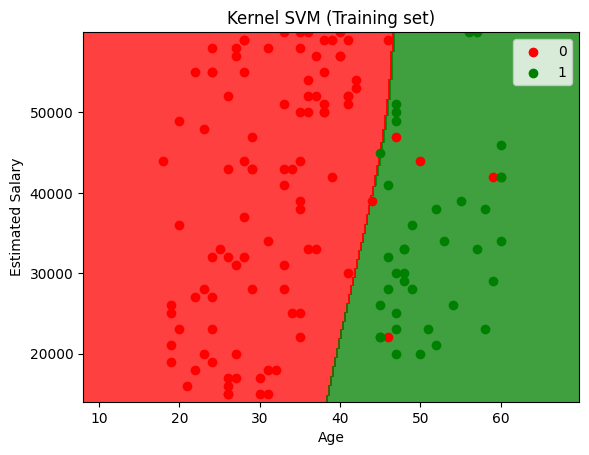

In [18]:
from matplotlib.colors import ListedColormap
X_set,y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10,stop = X_set[:,0].max() + 10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000,stop = X_set[:1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test result

/var/folders/9f/3bvh2cpx00q65vmntbjg24v00000gn/T/ipykernel_16010/59762769.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)


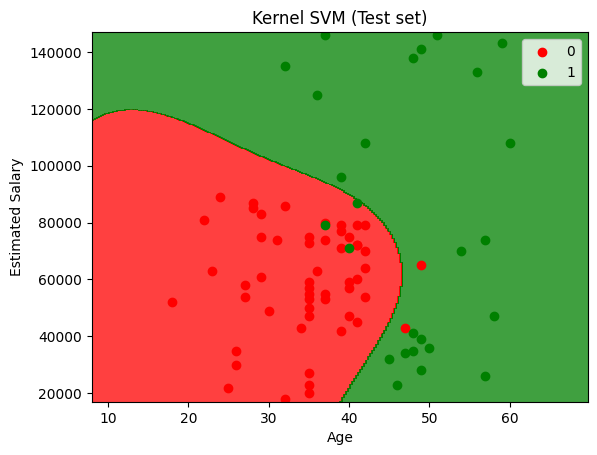

In [20]:
from matplotlib.colors import ListedColormap
X_set,y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10,stop = X_set[:,0].max() + 10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000,stop = X_set[:,1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()